# Proyecto Unidad 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import folium

In [2]:
Covid19 = pd.read_csv('200809COVID19MEXICO.csv',  encoding= 'unicode_escape')
Covid19.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-09,11c49c,2,3,2,1,2,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-09,144935,2,3,2,2,26,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-08-09,1bf200,2,4,9,1,9,9,15,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
3,2020-08-09,010133,2,4,26,1,26,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-08-09,1a1635,2,3,15,2,15,15,33,2,...,2,1,2,2,1,1,99,MÃ©xico,99,2


In [3]:
len(Covid19)

1091695

In [4]:
Hombres = len(Covid19.loc[Covid19['SEXO'] == 1])
print("Total de hombres en el dataset:",Hombres)

Total de hombres en el dataset: 548430


In [5]:
Mujeres = len(Covid19.loc[Covid19['SEXO'] == 2])
print("Total de mujeres en el dataset:",Mujeres)

Total de mujeres en el dataset: 543265


In [6]:
TOTAL_POSITIVOS = len(Covid19.loc[Covid19['RESULTADO'] == 1])
print("Total de casos que son positivos al COVID-19:",TOTAL_POSITIVOS)

Total de casos que son positivos al COVID-19: 480278


In [7]:
TOTAL_NEGATIVO = len(Covid19.loc[Covid19['RESULTADO'] == 2])
print("Total de casos que son negativos al COVID-19:",TOTAL_NEGATIVO)

Total de casos que son negativos al COVID-19: 526911


In [8]:
TOTAL_PENDIENTES = len(Covid19.loc[Covid19['RESULTADO'] == 3])
print("Total de casos pendientes de resultado a la prueba del COVID-19:",TOTAL_PENDIENTES)

Total de casos pendientes de resultado a la prueba del COVID-19: 84506


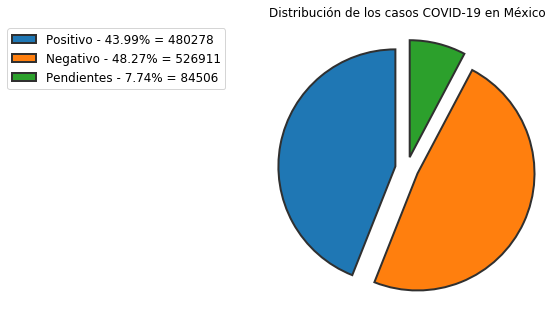

In [9]:
sizes = np.array([TOTAL_POSITIVOS, TOTAL_NEGATIVO, TOTAL_PENDIENTES])
# Plot
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title('Distribución de los casos COVID-19 en México')
patches, texts = ax1.pie(sizes, startangle=90, explode=(0.1,0.1,0.1),
            wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

porcent = 100.*sizes/sizes.sum()
tags = ['Positivo', 'Negativo', 'Pendientes']
labels = ['{0} - {1:0.2f}% = {2:0.0f}'.format(tags[x],porcent[x],sizes[x]) for x in range(len(tags))]

ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=12)
fig.tight_layout()

In [10]:
TOTAL_POSITIVOS+TOTAL_NEGATIVO+TOTAL_PENDIENTES

1091695

In [11]:
Covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091695 entries, 0 to 1091694
Data columns (total 35 columns):
FECHA_ACTUALIZACION    1091695 non-null object
ID_REGISTRO            1091695 non-null object
ORIGEN                 1091695 non-null int64
SECTOR                 1091695 non-null int64
ENTIDAD_UM             1091695 non-null int64
SEXO                   1091695 non-null int64
ENTIDAD_NAC            1091695 non-null int64
ENTIDAD_RES            1091695 non-null int64
MUNICIPIO_RES          1091695 non-null int64
TIPO_PACIENTE          1091695 non-null int64
FECHA_INGRESO          1091695 non-null object
FECHA_SINTOMAS         1091695 non-null object
FECHA_DEF              1091695 non-null object
INTUBADO               1091695 non-null int64
NEUMONIA               1091695 non-null int64
EDAD                   1091695 non-null int64
NACIONALIDAD           1091695 non-null int64
EMBARAZO               1091695 non-null int64
HABLA_LENGUA_INDIG     1091695 non-null int64
DIABETES

In [12]:
#Agregar nueva columna con las defunciones por COVID
Covid19['Sobrevivio'] = Covid19['FECHA_DEF'].apply(lambda toLabel: 0 if toLabel =='9999-99-99' else 1) 

In [13]:
TOTAL_DEFUNCIONES = len(Covid19.loc[(Covid19['Sobrevivio'] == 1)])
print("Total de defunciones:",TOTAL_DEFUNCIONES)

Total de defunciones: 67165


In [14]:
TOTAL_DEFUNCIONES = len(Covid19.loc[(Covid19['RESULTADO'] == 1) & (Covid19['Sobrevivio'] == 1)])
print("Total de defunciones por COVID-19:",TOTAL_DEFUNCIONES)

Total de defunciones por COVID-19: 52298


In [15]:
#Mostrar el nuemero de muertes y sobrevivientes.
Covid19['Sobrevivio'].value_counts()

0    1024530
1      67165
Name: Sobrevivio, dtype: int64

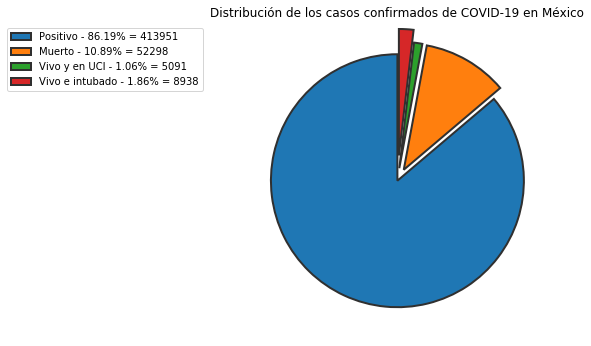

In [16]:
cpcounts = len(Covid19.loc[Covid19['RESULTADO'] == 1])
dpcounts = len(Covid19.loc[(Covid19['RESULTADO'] == 1) & (Covid19['Sobrevivio'] == 1)])
aicounts = len(Covid19.loc[(Covid19['RESULTADO'] == 1) & (Covid19['Sobrevivio'] == 1) & (Covid19['INTUBADO'] == 1)])
iccounts = len(Covid19.loc[(Covid19['RESULTADO'] == 1) & (Covid19['Sobrevivio'] == 0) & (Covid19['UCI'] == 1)])

sizes = np.array([cpcounts-dpcounts-aicounts-iccounts, dpcounts, iccounts,aicounts])
# Plot
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title('Distribución de los casos confirmados de COVID-19 en México')
patches, texts = ax1.pie(sizes, startangle=90, explode=(0.0,0.1,0.1,0.2),
            wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

porcent = 100.*sizes/sizes.sum()
tags = ['Positivo', 'Muerto', 'Vivo y en UCI', 'Vivo e intubado']
labels = ['{0} - {1:0.2f}% = {2:0.0f}'.format(tags[x],porcent[x],sizes[x]) for x in range(len(tags))]

ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=10)
fig.tight_layout()

In [17]:
df_Genero = Covid19.groupby('SEXO',axis=0).sum()

In [18]:
df_Genero.head()

,ORIGEN,SECTOR,ENTIDAD_UM,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,UCI,Sobrevivio
SEXO,,,,,,,,,,,,,,,,,,,,,
1,911673,5084740,8568545,8972402,8689844,20658702,632526,45207942,1037997,22981007,...,1269744,1206312,1124745,1204866,1190558,16252721,912811,54114924,45208227,24272
2,901020,5023972,8612460,9081703,8742973,21009587,665659,41066723,998471,23397033,...,1320297,1234082,1157217,1232832,1198433,16385938,874807,53555639,41067779,42893


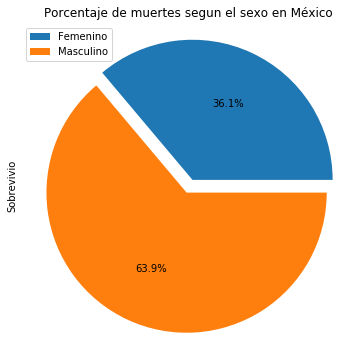

In [19]:
#Porcentaje de defunciones segun el genero o sexo
explode_list=[0.0 , 0.1]

df_Genero['Sobrevivio'].plot(kind='pie',figsize =(6,6),autopct='%1.1f%%',
                             startangle=0,
                             labels=None,
                             explode = explode_list)
plt.title('Porcentaje de muertes segun el sexo en México')
plt.axis('equal')
plt.legend(labels= ("Femenino","Masculino"), loc='upper left')
plt.show()

In [20]:
#Carga el csv con el nombre de los Sectores de salud
df_sector = pd.read_csv('SECTORES_NAME.csv')

In [21]:
df_sector.head()

,CLAVE,DESCRIPCIÓN
0,1,CRUZ ROJA
1,2,DIF
2,3,ESTATAL
3,4,IMSS
4,5,IMSS-BIENESTAR


In [22]:
Covid19['SECTOR'].head()

0    3
1    3
2    4
3    4
4    3
Name: SECTOR, dtype: int64

In [23]:
#Añadimos una nueva columna del total de las muertes en cada una de los sectores
df_sector['TOTAL_MUERTES'] = [len(Covid19.loc[(Covid19['SECTOR'] == x) & (Covid19['Sobrevivio'] == 1) & (Covid19.FECHA_DEF.notnull())]) 
for x in list(df_sector['CLAVE'])]

In [24]:
df_sector.head()

,CLAVE,DESCRIPCIÓN,TOTAL_MUERTES
0,1,CRUZ ROJA,5
1,2,DIF,2
2,3,ESTATAL,1441
3,4,IMSS,38041
4,5,IMSS-BIENESTAR,612


In [25]:
#Añadimos una nueva columna del total de los pacientes en cada sector
df_sector['TOTAL_PACIENTES'] = [len(Covid19.loc[(Covid19['SECTOR'] == x) & (Covid19['Sobrevivio'] == 0)]) 
for x in list(df_sector['CLAVE'])]

In [26]:
df_sector.head()

,CLAVE,DESCRIPCIÓN,TOTAL_MUERTES,TOTAL_PACIENTES
0,1,CRUZ ROJA,5,171
1,2,DIF,2,207
2,3,ESTATAL,1441,20360
3,4,IMSS,38041,249830
4,5,IMSS-BIENESTAR,612,6956


In [27]:
df_sector['TOTAL_MPOSITIVOS'] = [len(Covid19.loc[(Covid19['SECTOR'] == x) & (Covid19['Sobrevivio'] == 1) & (Covid19.FECHA_DEF.notnull()) & (Covid19['RESULTADO'] == 1)]) 
for x in list(df_sector['CLAVE'])]
df_sector.head()

,CLAVE,DESCRIPCIÓN,TOTAL_MUERTES,TOTAL_PACIENTES,TOTAL_MPOSITIVOS
0,1,CRUZ ROJA,5,171,3
1,2,DIF,2,207,0
2,3,ESTATAL,1441,20360,1243
3,4,IMSS,38041,249830,29116
4,5,IMSS-BIENESTAR,612,6956,438


In [28]:
df_sector.head()

,CLAVE,DESCRIPCIÓN,TOTAL_MUERTES,TOTAL_PACIENTES,TOTAL_MPOSITIVOS
0,1,CRUZ ROJA,5,171,3
1,2,DIF,2,207,0
2,3,ESTATAL,1441,20360,1243
3,4,IMSS,38041,249830,29116
4,5,IMSS-BIENESTAR,612,6956,438


In [29]:
#Ordenar del mayor al menor numero de pacientes por sector salud
df_sector = df_sector.sort_values('TOTAL_PACIENTES', ascending=False)
df_sector = df_sector.fillna(0)

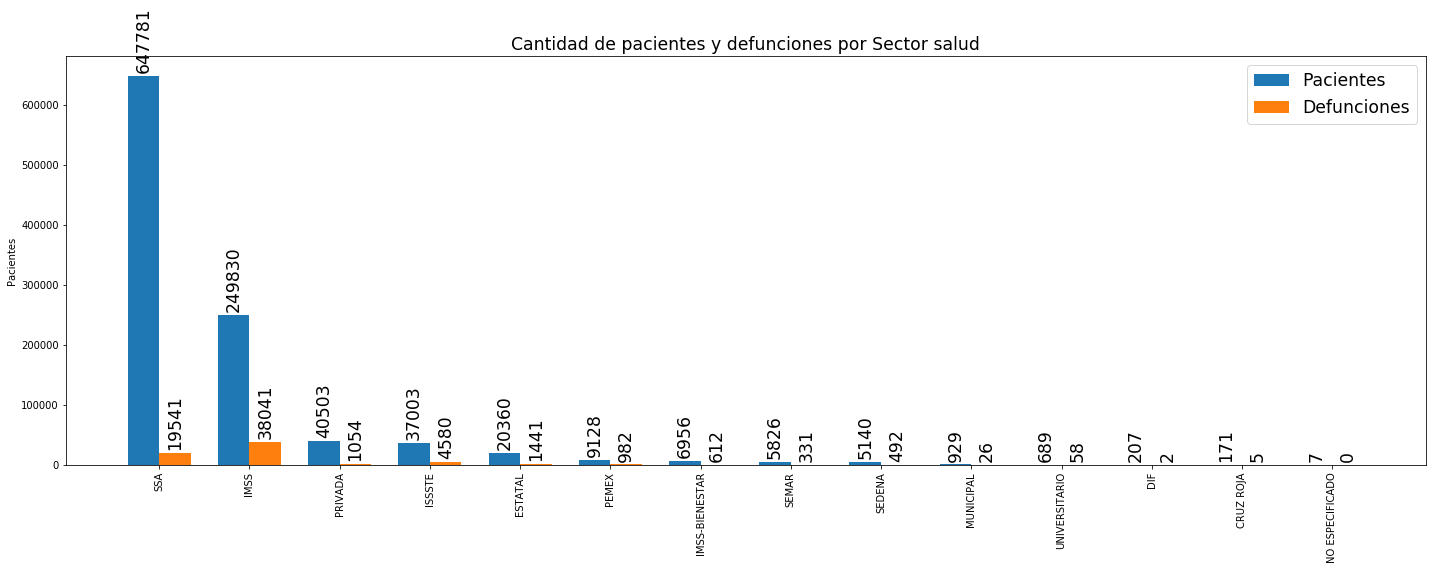

In [30]:
#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(df_sector['DESCRIPCIÓN']))
#tamaño de cada barra
width = 0.35
fig, ax = plt.subplots(figsize=(20, 8))
#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, df_sector['TOTAL_PACIENTES'], width)
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, df_sector['TOTAL_MUERTES'], width)
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Pacientes')
ax.set_title('Cantidad de pacientes y defunciones por Sector salud', fontsize='xx-large')
ax.set_xticks(x)
ax.set_xticklabels(df_sector['DESCRIPCIÓN'],rotation='vertical')
ax.legend(labels= ("Pacientes","Defunciones"), loc='upper right', fontsize='xx-large')
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation='vertical',fontsize='xx-large')
#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
#Mostramos la grafica con el metodo show()
plt.show()

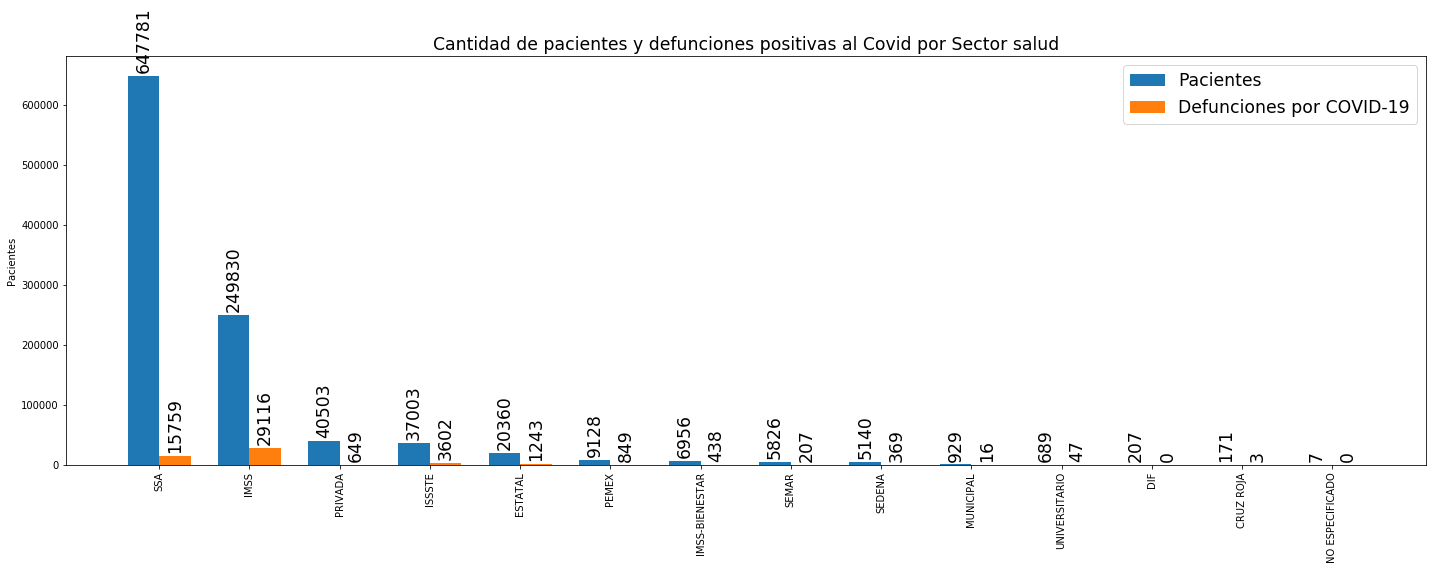

In [31]:
#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(df_sector['DESCRIPCIÓN']))
#tamaño de cada barra
width = 0.35
fig, ax = plt.subplots(figsize=(20, 8))
#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, df_sector['TOTAL_PACIENTES'], width)
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, df_sector['TOTAL_MPOSITIVOS'], width)
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Pacientes')
ax.set_title('Cantidad de pacientes y defunciones positivas al Covid por Sector salud', fontsize='xx-large')
ax.set_xticks(x)
ax.set_xticklabels(df_sector['DESCRIPCIÓN'],rotation='vertical')
ax.legend(labels= ("Pacientes","Defunciones por COVID-19"), loc='upper right', fontsize='xx-large')
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation='vertical',fontsize='xx-large')
#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
#Mostramos la grafica con el metodo show()
plt.show()

In [32]:
#Agrupacion de casos por rango de edades
def Edades(x):
    if x <=10:
        grupo = 'INFANTE'
    elif x<=20:
        grupo = 'ADOLESCENTE'
    elif x<=30:
        grupo = 'RANGO (20 a 29 años)'
    elif x<=40:
        grupo = 'RANGO (30 a 39 años)'
    elif x<=50:
        grupo = 'RANGO (40 a 49 años)'
    elif x<=60:
        grupo = 'RANGO (50 a 59 años)'
    elif x <=70:
        grupo = 'RANGO (60 a 69 años)'
    else:
        grupo = 'MAYOR 69 años'
    return grupo

Covid19['GRUPO'] = Covid19.EDAD.apply(Edades)

In [33]:
Covid19.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Sobrevivio,GRUPO
0,2020-08-09,11c49c,2,3,2,1,2,2,2,1,...,2,2,1,1,99,MÃ©xico,99,97,0,RANGO (60 a 69 años)
1,2020-08-09,144935,2,3,2,2,26,2,2,1,...,2,2,1,1,99,MÃ©xico,99,97,0,RANGO (20 a 29 años)
2,2020-08-09,1bf200,2,4,9,1,9,9,15,2,...,2,2,99,1,99,MÃ©xico,99,2,0,RANGO (60 a 69 años)
3,2020-08-09,010133,2,4,26,1,26,26,55,1,...,2,2,99,1,99,MÃ©xico,99,97,0,RANGO (20 a 29 años)
4,2020-08-09,1a1635,2,3,15,2,15,15,33,2,...,2,2,1,1,99,MÃ©xico,99,2,1,RANGO (40 a 49 años)


In [77]:
PorEdades = Covid19[['RESULTADO','SEXO','Sobrevivio','GRUPO']]

In [78]:
PorEdades.head(8)

,RESULTADO,SEXO,Sobrevivio,GRUPO
0,1,1,0,RANGO (60 a 69 años)
1,1,2,0,RANGO (20 a 29 años)
2,1,1,0,RANGO (60 a 69 años)
3,1,1,0,RANGO (20 a 29 años)
4,1,2,1,RANGO (40 a 49 años)
5,1,2,1,RANGO (50 a 59 años)
6,1,2,1,RANGO (50 a 59 años)
7,1,1,0,RANGO (60 a 69 años)


In [79]:
PorEdades = PorEdades.groupby(['GRUPO']).sum()

In [80]:
PorEdades = PorEdades.sort_values('RESULTADO', ascending=False)
PorEdades = PorEdades.fillna(0)

In [81]:
PorEdades.head(8)

,RESULTADO,SEXO,Sobrevivio
GRUPO,,,
RANGO (30 a 39 años),430567,384790,3584
RANGO (40 a 49 años),376425,345458,8869
RANGO (20 a 29 años),351164,303602,1233
RANGO (50 a 59 años),264167,253154,15492
RANGO (60 a 69 años),139534,141691,17803
MAYOR 69 años,101477,102446,19422
ADOLESCENTE,77588,65269,274
INFANTE,46696,38550,488


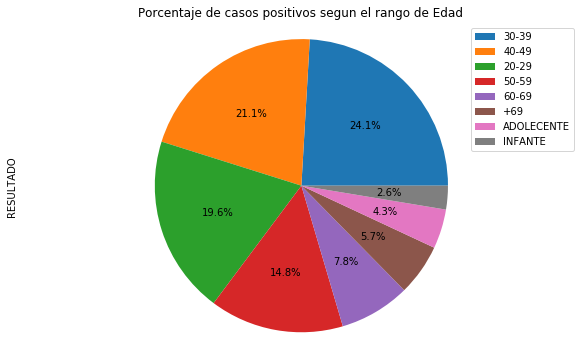

In [40]:
explode_list=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

PorEdades['RESULTADO'].plot(kind='pie',figsize =(10,6),autopct='%1.1f%%',
                             startangle=0,
                             labels=None,
                             explode = explode_list)
plt.title('Porcentaje de casos positivos segun el rango de Edad')
plt.axis('equal')
plt.legend(labels= ("30-39","40-49","20-29","50-59","60-69","+69","ADOLECENTE","INFANTE"), loc='upper right')
plt.show()

In [140]:
EstadosNames = pd.read_csv('ESTADOS.csv',  encoding= 'unicode_escape')
EstadosNames.head(5)

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA,X,Y
0,1,Aguascalientes,AS,21.77111,-102.35861
1,2,Baja California,BC,30.73563,-115.99649
2,3,Baja California Sur,BS,24.07250,-110.36222
3,4,Campeche,CC,19.84540,-90.52370
4,5,Coahuila,CL,26.91030,-101.42226


In [141]:
EstadosNames['TOTAL_PACIENTES'] = [len(Covid19.loc[(Covid19['ENTIDAD_UM'] == x) & (Covid19['Sobrevivio'] == 0) | (Covid19['Sobrevivio'] == 1)]) 
for x in list(EstadosNames['CLAVE_ENTIDAD'])]

In [142]:
EstadosNames['TOTAL_MUERTES'] = [len(Covid19.loc[(Covid19['ENTIDAD_UM'] == x) & (Covid19['Sobrevivio'] == 1)]) 
for x in list(EstadosNames['CLAVE_ENTIDAD'])]

In [143]:
EstadosNames['TOTAL_MUERTESP'] = [len(Covid19.loc[(Covid19['ENTIDAD_UM'] == x) & (Covid19['Sobrevivio'] == 1) & (Covid19['RESULTADO'] == 1)]) 
for x in list(EstadosNames['CLAVE_ENTIDAD'])]

In [144]:
EstadosNames['TOTAL_POSITOVPS'] = [len(Covid19.loc[(Covid19['ENTIDAD_UM'] == x) & (Covid19['RESULTADO'] == 1)]) 
for x in list(EstadosNames['CLAVE_ENTIDAD'])]

In [145]:
EstadosNames.head(10)

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA,X,Y,TOTAL_PACIENTES,TOTAL_MUERTES,TOTAL_MUERTESP,TOTAL_POSITOVPS
0,1,Aguascalientes,AS,21.77111,-102.35861,80657,344,284,4591
1,2,Baja California,BC,30.73563,-115.99649,87453,3401,2774,14385
2,3,Baja California Sur,BS,24.07250,-110.36222,79879,298,214,5451
3,4,Campeche,CC,19.84540,-90.52370,75614,740,603,5112
4,5,Coahuila,CL,26.91030,-101.42226,106442,1270,873,15580
5,6,Colima,CM,19.14736,-103.72244,71286,380,272,2337
6,7,Chiapas,CS,15.34004,-92.67422,74997,1063,946,5713
7,8,Chihuahua,CH,28.15096,-106.21278,79807,1575,964,5996
8,9,Ciudad de MÃ©xico,DF,19.39504,-99.18701,307079,12657,9407,97308
9,10,Durango,DG,24.05718,-104.53320,81860,468,334,4769


In [146]:
EstadosNames.drop(['ABREVIATURA'], axis=1, inplace=True)

In [147]:
x = np.arange(len(EstadosNames['ENTIDAD_FEDERATIVA']))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

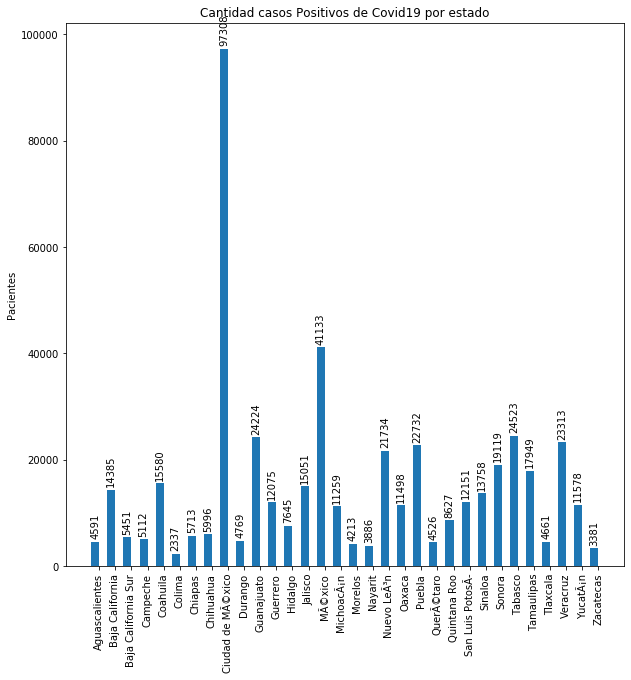

In [148]:
#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(EstadosNames['ENTIDAD_FEDERATIVA']))
#tamaño de cada barra
width = 0.5
fig, ax = plt.subplots(figsize=(10, 10))
#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, EstadosNames['TOTAL_POSITOVPS'], width)
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Pacientes')
ax.set_title('Cantidad casos Positivos de Covid19 por estado')
ax.set_xticks(x)
ax.set_xticklabels(EstadosNames['ENTIDAD_FEDERATIVA'],rotation='vertical')
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation='vertical',fontsize='medium')
#Añadimos las etiquetas para cada barra
autolabel(rects1)
#Mostramos la grafica con el metodo show()
plt.show()

In [151]:
from folium import plugins
from folium.features import DivIcon
latitude = 23.634501 
longitude = -102.552784
Mx_map = folium.Map(location = [latitude,longitude], zoom_start=5)
for lat, log, label in zip(EstadosNames.X, EstadosNames.Y, EstadosNames.TOTAL_POSITOVPS):
    folium.map.Marker(
    [lat + 0.5, log - 1],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12pt">%s</div>' % label,
        )).add_to(Mx_map)   
Mx_map

In [51]:
Mexico_Geo = r'estados.json'

In [116]:
Mexico_Mapa = folium.Map(location = [0,0],zoom_start=2,tiles = 'Mapbox Bright')
Mexico_Mapa.choropleth(
    geo_data = Mexico_Geo,
    data = EstadosNames,
    columns = ['ENTIDAD_FEDERATIVA','TOTAL_POSITOVPS'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Cantidad casos Positivos de Covid19 por estado'
    )
Mexico_Mapa

C:\Users\JoseC\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [53]:
Mexico_Mapa = folium.Map(location = [0,0],zoom_start=2,tiles = 'Mapbox Bright')
Mexico_Mapa.choropleth(
    geo_data = Mexico_Geo,
    data = EstadosNames,
    columns = ['ENTIDAD_FEDERATIVA','TOTAL_MUERTESP'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Muertes confimadas por Covid19 en México'
    )   
Mexico_Mapa

In [54]:
#Diagrama de correlacion

In [55]:
AnalisisCorr = Covid19[['OBESIDAD','NEUMONIA','DIABETES','HIPERTENSION','EPOC','ASMA','SEXO','RESULTADO','Sobrevivio']]

In [56]:
AnalisisCorr.head()

,OBESIDAD,NEUMONIA,DIABETES,HIPERTENSION,EPOC,ASMA,SEXO,RESULTADO,Sobrevivio
0,2,2,2,1,2,2,1,1,0
1,2,2,2,2,2,2,2,1,0
2,2,2,2,1,2,2,1,1,0
3,2,1,2,2,2,2,1,1,0
4,1,1,2,2,2,2,2,1,1


In [57]:
AnalisiCorr = AnalisisCorr.corr(method='pearson')

In [58]:
import seaborn as sns

In [59]:
AnalisiCorr.style.background_gradient(cmap='Reds', axis=None)

,OBESIDAD,NEUMONIA,DIABETES,HIPERTENSION,EPOC,ASMA,SEXO,RESULTADO,Sobrevivio
OBESIDAD,1,-0.0082886,0.766805,0.818052,0.833178,0.843296,0.00807059,0.00173553,0.0126663
NEUMONIA,-0.0082886,1,-0.00202807,-0.00120328,-0.00863764,-0.010267,-0.0532396,0.0950563,-0.286915
DIABETES,0.766805,-0.00202807,1,0.837984,0.830961,0.831722,0.0075368,0.00355018,0.00322662
HIPERTENSION,0.818052,-0.00120328,0.837984,1,0.86214,0.871192,0.00771115,0.00394631,0.00102882
EPOC,0.833178,-0.00863764,0.830961,0.86214,1,0.915897,0.00814776,-0.00240082,0.0157073
ASMA,0.843296,-0.010267,0.831722,0.871192,0.915897,1,0.00916286,-0.00235495,0.0173753
SEXO,0.00807059,-0.0532396,0.0075368,0.00771115,0.00814776,0.00916286,1,-0.0435674,0.0721976
RESULTADO,0.00173553,0.0950563,0.00355018,0.00394631,-0.00240082,-0.00235495,-0.0435674,1,-0.156595
Sobrevivio,0.0126663,-0.286915,0.00322662,0.00102882,0.0157073,0.0173753,0.0721976,-0.156595,1


### Entrenar y calificar el modelo del árbol de decisiones.
### Considerando las variables: UCI, NEUMONIA E INTUBADO

In [60]:
y_target = Covid19["Sobrevivio"].values

In [61]:
columns = ["SEXO", "INTUBADO", "NEUMONIA", "EDAD", "EMBARAZO","DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA","TABAQUISMO","UCI"]
X_input = Covid19[list(columns)].values

In [62]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf_train = clf_train.fit(X_input, y_target)

In [63]:
clf_train.score(X_input,y_target)

0.9430830039525692

### Visualizar el árbol

In [64]:
Resultado = ['No sobrevivie','Sobrevivie']

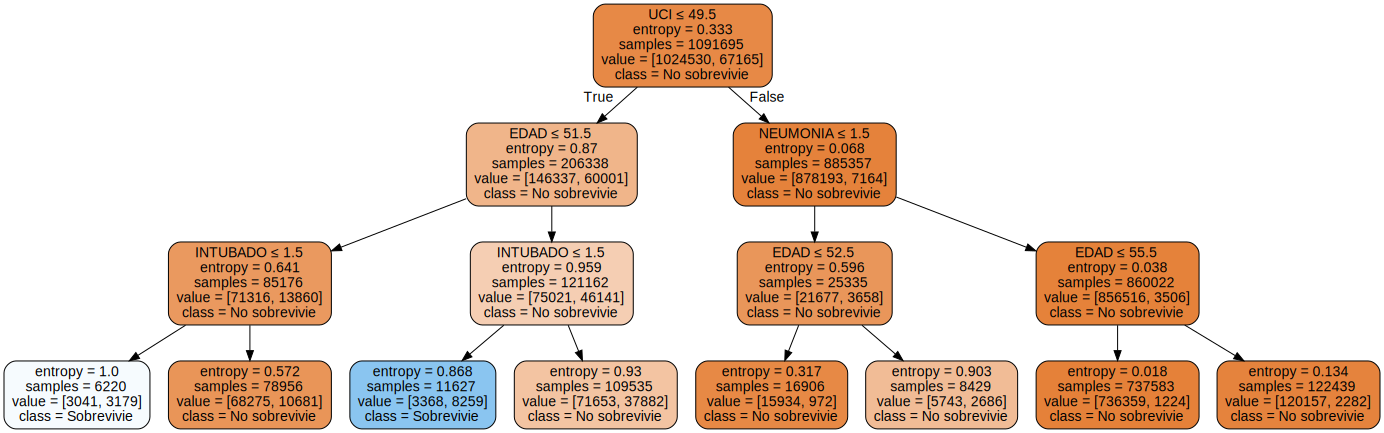

In [65]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,
                                class_names = Resultado,
                                feature_names = columns,
                                filled = True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('CovidTree', format='png')
graph